In [77]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [78]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
#norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot__7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [79]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [80]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,layer_dict.conv0.conv.bias_alpha,...,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.091724,-4.661224e-08,3.373524,0.091724,0.000036,-0.000383,132.351868,2.655266,0.002046,5.400434,...,0.000460,0.060749,-1.177761e-09,0.114837,0.060749,0.017638,-0.000631,0.014007,0.007311,0.000014
1,0.083051,-1.519919e-05,3.140809,0.083051,0.000030,-0.000383,132.351950,2.655269,0.002046,5.004828,...,0.000460,0.058176,-1.039058e-09,0.110115,0.058176,0.015957,-0.000631,0.014774,0.007723,0.000016
2,0.077018,-1.200643e-05,2.960441,0.077018,0.000025,-0.000383,132.351890,2.655271,0.002046,4.521400,...,0.000460,0.056508,3.129829e-11,0.107203,0.056508,0.014540,-0.000631,0.015393,0.008050,0.000018
3,0.073832,-7.445776e-06,2.812459,0.073832,0.000022,-0.000383,132.351794,2.655272,0.002046,4.028868,...,0.000461,0.055737,2.433753e-09,0.105377,0.055737,0.013659,-0.000631,0.016057,0.008400,0.000022
4,0.072150,-4.984345e-06,2.648413,0.072150,0.000020,-0.000383,132.351681,2.655274,0.002046,3.784856,...,0.000461,0.055409,4.327593e-09,0.104747,0.055409,0.013163,-0.000631,0.016745,0.008764,0.000028


In [97]:
per_inner_loop_step['layer_dict.conv0.conv.weight_grad_mean']

num_step
0   -4.661224e-08
1   -1.519919e-05
2   -1.200643e-05
3   -7.445776e-06
4   -4.984345e-06
Name: layer_dict.conv0.conv.weight_grad_mean, dtype: float64

In [81]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    2.125709
1    1.639006
2    1.170894
3    0.849623
4    0.738223
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [82]:
per_inner_loop_step['layer_dict.linear.weights_weight_L2norm']

num_step
0    2.710461
1    2.710423
2    2.711304
3    2.712468
4    2.713615
Name: layer_dict.linear.weights_weight_L2norm, dtype: float64

In [83]:
per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm']

num_step
0    30.805229
1    29.890629
2    28.623313
3    27.118784
4    26.243129
Name: layer_dict.conv3.conv.weight_grad_L2norm, dtype: float64

In [84]:
per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm']

num_step
0    12.834554
1    12.838830
2    12.842852
3    12.846548
4    12.849863
Name: layer_dict.conv3.conv.weight_weight_L2norm, dtype: float64

In [85]:
# specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values = norm_info_train
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.weights_weight_var,layer_dict.linear.bias_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var
0,0,train,0,9.759704e-01,4.850590e-05,3.748490e+01,9.759703e-01,2.756903e-04,-0.000919,124.344971,...,0.000630,1.035130e+00,2.384186e-08,1.847870e+00,1.035130e+00,2.678736e-01,0.000000e+00,0.000000,0.000000,0.000000
1,0,train,1,9.664179e-01,-7.585667e-04,3.876365e+01,9.664179e-01,2.697467e-04,-0.000919,124.334770,...,0.000630,1.021947e+00,-2.384186e-08,1.821589e+00,1.021947e+00,2.610941e-01,-1.862645e-10,0.018479,0.010351,0.000027
2,0,train,2,9.522825e-01,-3.069457e-04,3.968686e+01,9.522825e-01,2.623781e-04,-0.000912,124.323204,...,0.000630,1.016940e+00,-2.384186e-08,1.808054e+00,1.016940e+00,2.585419e-01,3.725290e-10,0.036695,0.020570,0.000106
3,0,train,3,9.326072e-01,-1.753909e-03,3.929183e+01,9.326072e-01,2.486613e-04,-0.000909,124.312714,...,0.000630,1.014162e+00,1.192093e-08,1.795479e+00,1.014162e+00,2.571310e-01,0.000000e+00,0.054775,0.030734,0.000236
4,0,train,4,9.020799e-01,3.171956e-04,3.642447e+01,9.020800e-01,2.354271e-04,-0.000891,124.299217,...,0.000630,1.015019e+00,-2.384186e-08,1.780638e+00,1.015018e+00,2.575657e-01,3.725290e-10,0.072730,0.040861,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196995,74999,train,0,2.097469e-09,6.224384e-12,6.865943e-08,2.097469e-09,1.234582e-21,-0.000340,142.294006,...,0.000544,2.132116e-10,0.000000e+00,4.338445e-10,2.132116e-10,1.136480e-20,-1.654899e-03,0.024058,0.012256,0.000034
1196996,74999,train,1,3.810245e-09,-1.383681e-12,1.284554e-07,3.810245e-09,4.200101e-21,-0.000340,142.294006,...,0.000544,3.799661e-10,1.110223e-17,6.249788e-10,3.799661e-10,3.609357e-20,-1.654899e-03,0.024058,0.012256,0.000034
1196997,74999,train,2,7.361296e-09,-8.670642e-12,2.597061e-07,7.361296e-09,1.560893e-20,-0.000340,142.294006,...,0.000544,7.088068e-10,9.992008e-17,1.252560e-09,7.088068e-10,1.256018e-19,-1.654899e-03,0.024058,0.012256,0.000034
1196998,74999,train,3,1.901137e-08,-2.383764e-11,6.409435e-07,1.901136e-08,1.040429e-19,-0.000340,142.294006,...,0.000545,1.735506e-09,-2.109424e-16,3.589373e-09,1.735506e-09,7.529956e-19,-1.654899e-03,0.024058,0.012256,0.000034


In [86]:
gr = specific_column_values.groupby('current_iter').mean()

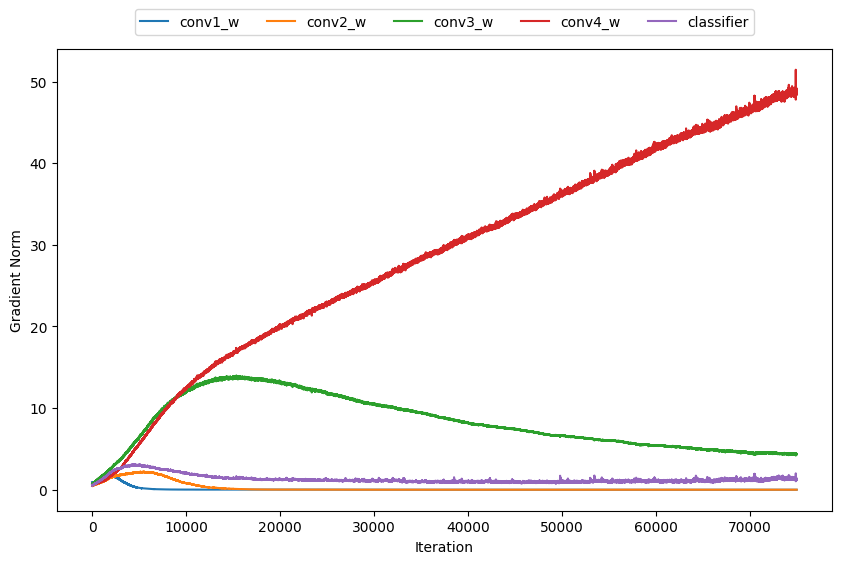

In [87]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

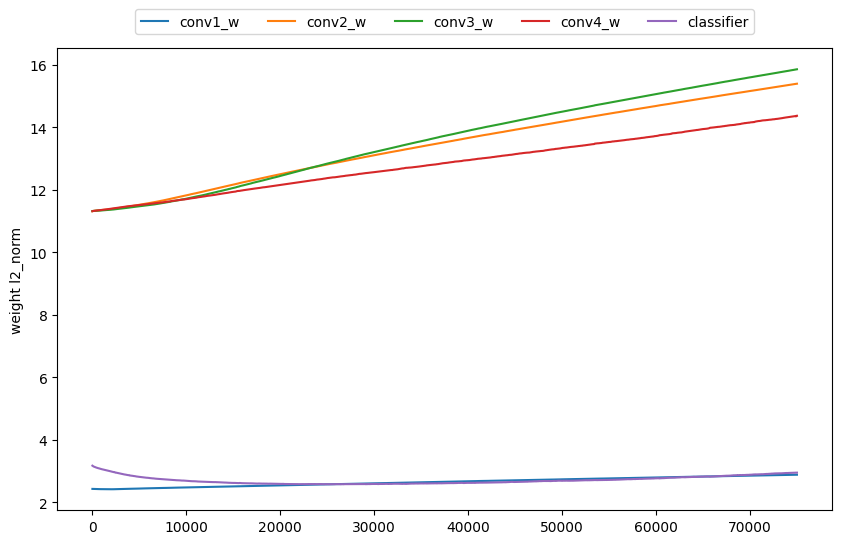

In [88]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

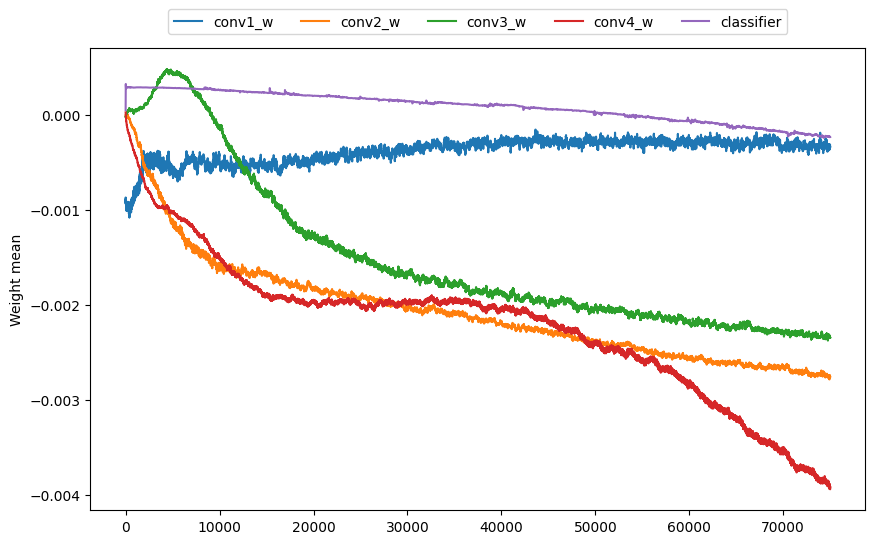

In [89]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

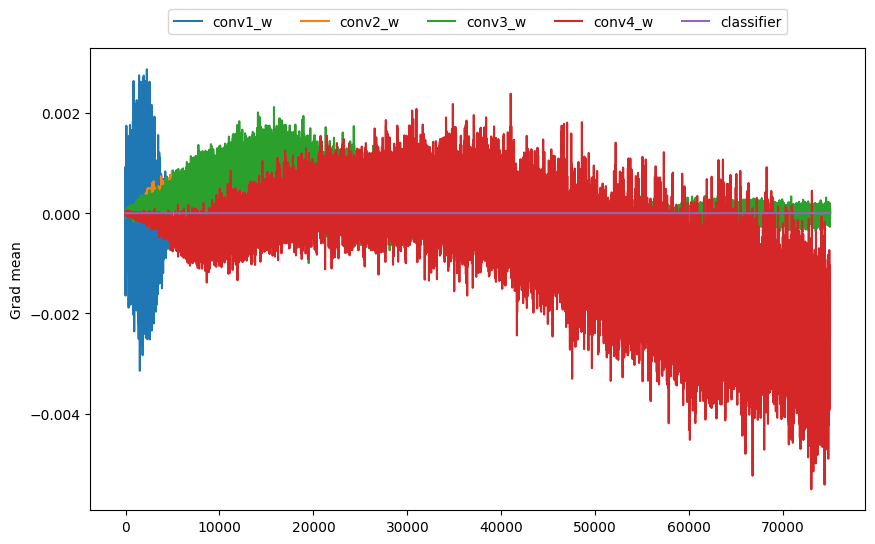

In [99]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# MAML의 Scale과 맞춘다
#plt.ylim([-0.006, 0.006])

plt.show()  # 그래프 보여주기

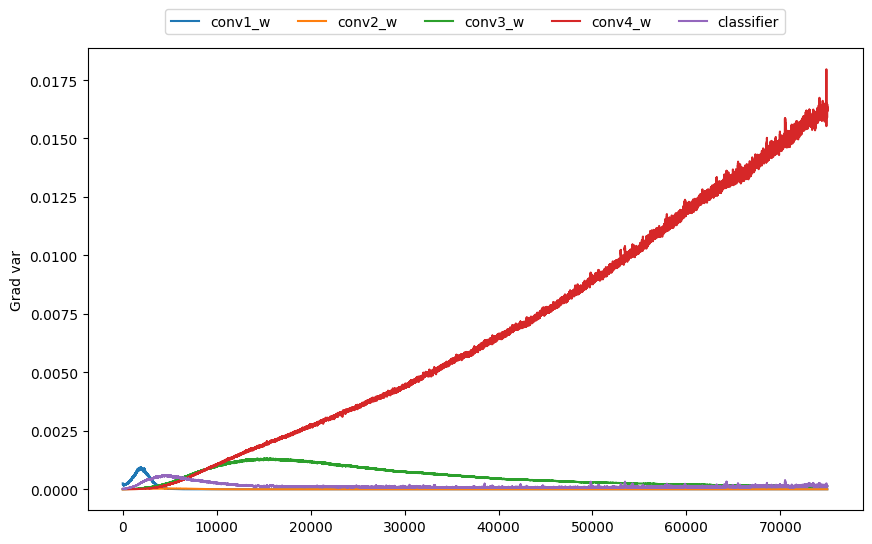

In [101]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.ylim([0.000, 0.025])

plt.show()  # 그래프 보여주기

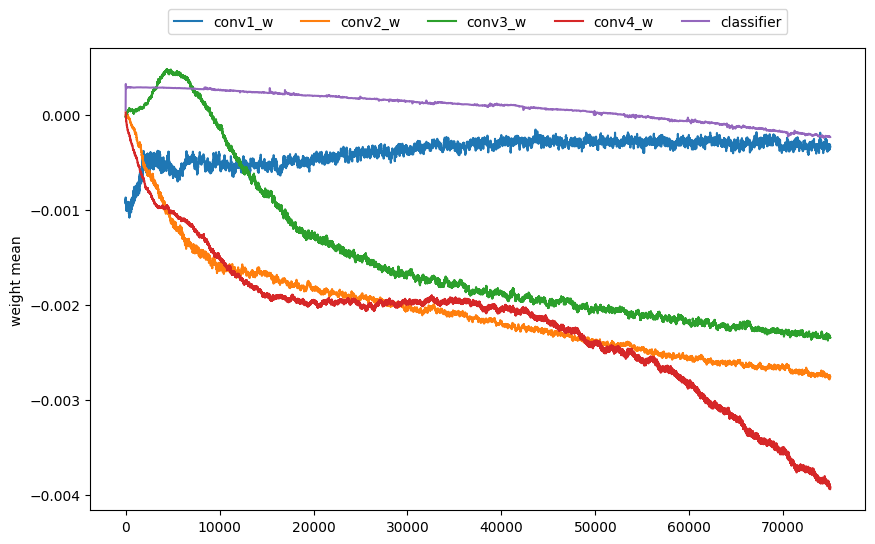

In [92]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

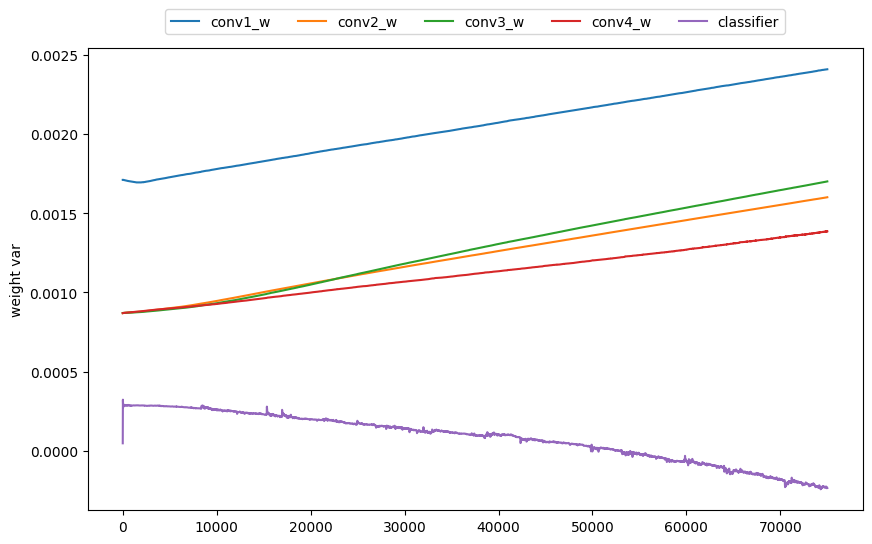

In [93]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

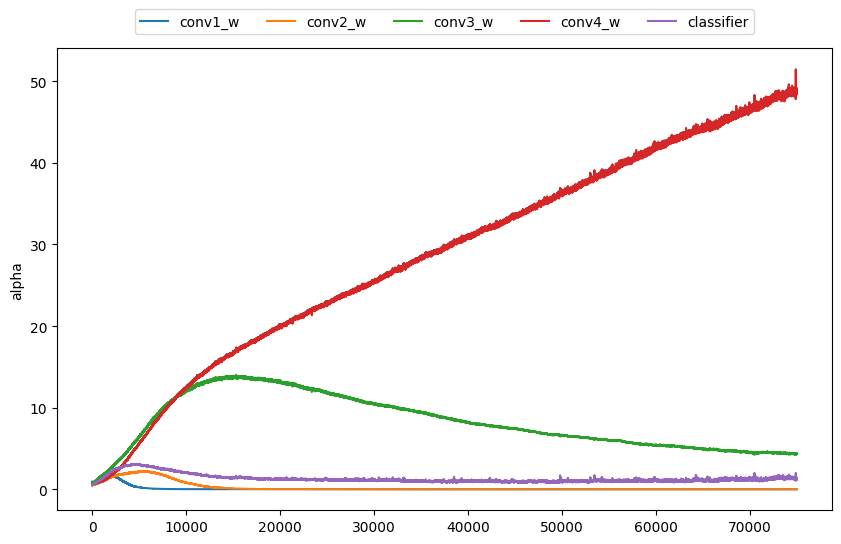

In [94]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기